# Clustering of Credit Card Users

MARIANO, Isaiah John L.

REGALARIO, Jeremiah Daniel A.

In [1]:
# Colab
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

try:
    from kneed import KneeLocator
except:
    !pip install kneed
    from kneed import KneeLocator


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Clustering Algorithm

## Load the Merged Dataset

In [2]:
#colab
'''
#Enter dataset here
dataset = "stdscale_binned_scaled_all_notenfreq_df.parquet"

cluster_df = pd.read_parquet("/content/drive/MyDrive/BPI Clustering Project/Scaled Datasets/{i}.parquet".format(i = dataset))
cluster_df.head()
'''

#local

#Enter dataset here
dataset = "stdscale_binned_scaled_all_notenfreq_df.parquet"

cluster_df = pd.read_parquet(dataset)
cluster_df.head()

EDUCATION       AGE  BUSINESS_OWNER  DIGITAL_FLAG  SUBSEGMENT  \
CUST_NUM                                                                      
13401.256807   0.054966 -1.524019       -0.366542       -0.5594   -1.457183   
4230.004965   -2.533880 -1.606718       -0.366542       -0.5594    1.078311   
4481.937304   -2.533880 -1.524019       -0.366542       -0.5594    1.078311   
4734.959768   -2.533880 -1.524019       -0.366542       -0.5594   -1.457183   
4828.128416    0.054966 -1.524019       -0.366542       -0.5594   -0.189436   

              LATITUDE  LONGITUDE  INCOME_SOURCE_ALLOWANCE  \
CUST_NUM                                                     
13401.256807  0.817697  -0.915328                -0.232747   
4230.004965   0.417464  -0.444865                 4.296519   
4481.937304   0.417464  -0.444865                -0.232747   
4734.959768   0.417464  -0.444865                -0.232747   
4828.128416   0.417464  -0.444865                -0.232747   

              INCOME_SOURCE_BUSINESS  INCOME_SOURCE_COMMISSION  \
CUST_NUM                                                         
13401.256807               -0.348316                 -0.095806   
4230.004965                -0.348316                 -0.095806   
4481.937304                -0.348316                 -0.095806   
4734.959768                -0.348316                 -0.095806   
4828.128416                -0.348316                 -0.095806   

              INCOME_SOURCE_DONATION  INCOME_SOURCE_ECONOMICALLY_INACTIVE  \
CUST_NUM                                                                    
13401.256807               -0.014173                            -0.030785   
4230.004965                -0.014173                            -0.030785   
4481.937304                -0.014173                            -0.030785   
4734.959768                -0.014173                            -0.030785   
4828.128416                -0.014173                            -0.030785   

              INCOME_SOURCE_INTEREST_SAVINGS_PLACEMENTS_INVESTMENTS  \
CUST_NUM                                                              
13401.256807                                          -0.089343       
4230.004965                                           -0.089343       
4481.937304                                           -0.089343       
4734.959768                                           -0.089343       
4828.128416                                           -0.089343       

              INCOME_SOURCE_OTHER_SOURCES_NOT_SPECIFIED  \
CUST_NUM                                                  
13401.256807                                  -0.092076   
4230.004965                                   -0.092076   
4481.937304                                   -0.092076   
4734.959768                                   -0.092076   
4828.128416                                   -0.092076   

              INCOME_SOURCE_PENSION  INCOME_SOURCE_REMITTANCE  \
CUST_NUM                                                        
13401.256807              -0.177711                 -0.183888   
4230.004965               -0.177711                 -0.183888   
4481.937304               -0.177711                 -0.183888   
4734.959768               -0.177711                 -0.183888   
4828.128416               -0.177711                  5.438089   

              INCOME_SOURCE_SALARY  GENDER_FEMALE  GENDER_MALE  GENDER_OTHERS  \
CUST_NUM                                                                        
13401.256807              0.576544      -1.172048     1.219359      -0.139788   
4230.004965              -1.734473      -1.172048     1.219359      -0.139788   
4481.937304               0.576544       0.853207    -0.820103      -0.139788   
4734.959768               0.576544       0.853207    -0.820103      -0.139788   
4828.128416              -1.734473       0.853207    -0.820103      -0.139788   

              MARITAL_STATUS_DIVORCED  MARITAL_STATUS_MARRIED  \
CUST_NUM             

## DBSCAN with PCA

### PCA

#### Cumulative Explained Variance Ratio

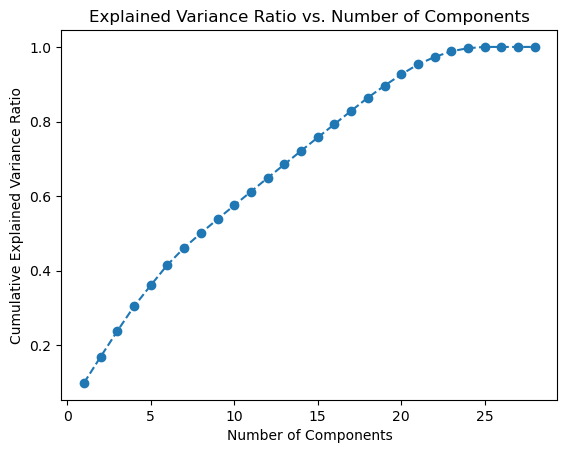

In [3]:
pca = PCA()
pca.fit(cluster_df)
explained_variance_ratio = pca.explained_variance_ratio_

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

#### Scree Plot

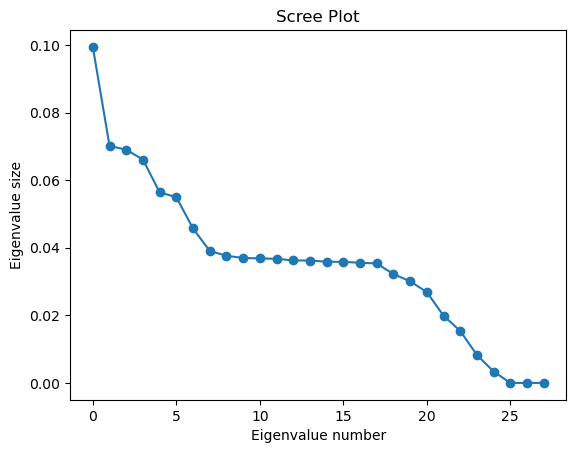

In [4]:
plt.plot(pca.explained_variance_ratio_, marker = 'o')
plt.xlabel('Eigenvalue number')
plt.ylabel('Eigenvalue size')
plt.title('Scree Plot')
plt.show()

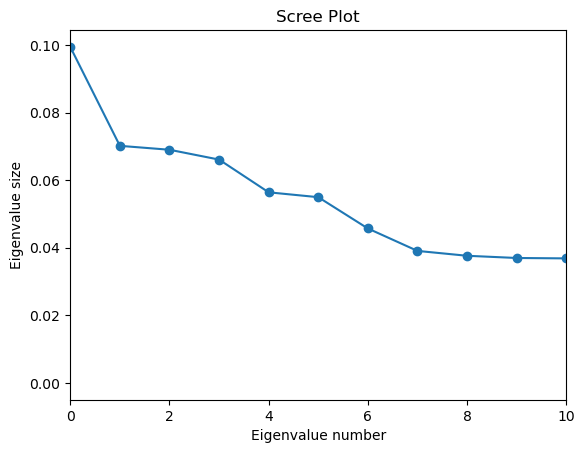

In [4]:
plt.plot(pca.explained_variance_ratio_, marker = 'o')
plt.xlabel('Eigenvalue number')
plt.ylabel('Eigenvalue size')
plt.title('Scree Plot')
plt.xlim(0, 10)
plt.show()


The "elbow point" in the plot is where the explained variance starts to level off. This is a good indicator of the number of components to retain. We chose 6 as the number of components.

#### Fit Transform

In [5]:
pca = PCA(n_components = 6)
X_principal = pca.fit_transform(cluster_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2','P3', 'P4','P5', 'P6']

X_principal.head()

P1        P2        P3        P4        P5        P6
0 -2.070679  1.594200 -0.826389 -1.349365  0.602605 -0.960723
1  0.329483  1.572129 -1.019442 -1.190398  0.530078 -0.863978
2 -1.317650 -1.187615 -0.341453 -1.163973  0.954262 -0.809022
3 -1.895610 -1.206217 -0.088004 -1.126725  1.247489 -1.323938
4 -0.003721 -1.213370  0.316131 -0.885239  2.901095  0.076922

#### Correlation Matrix

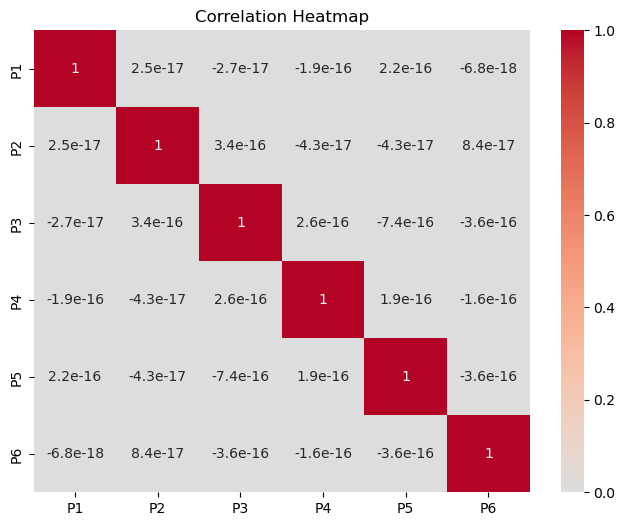

In [7]:
# Calculate the correlation matrix
corr_matrix = X_principal.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

#### Pairplot

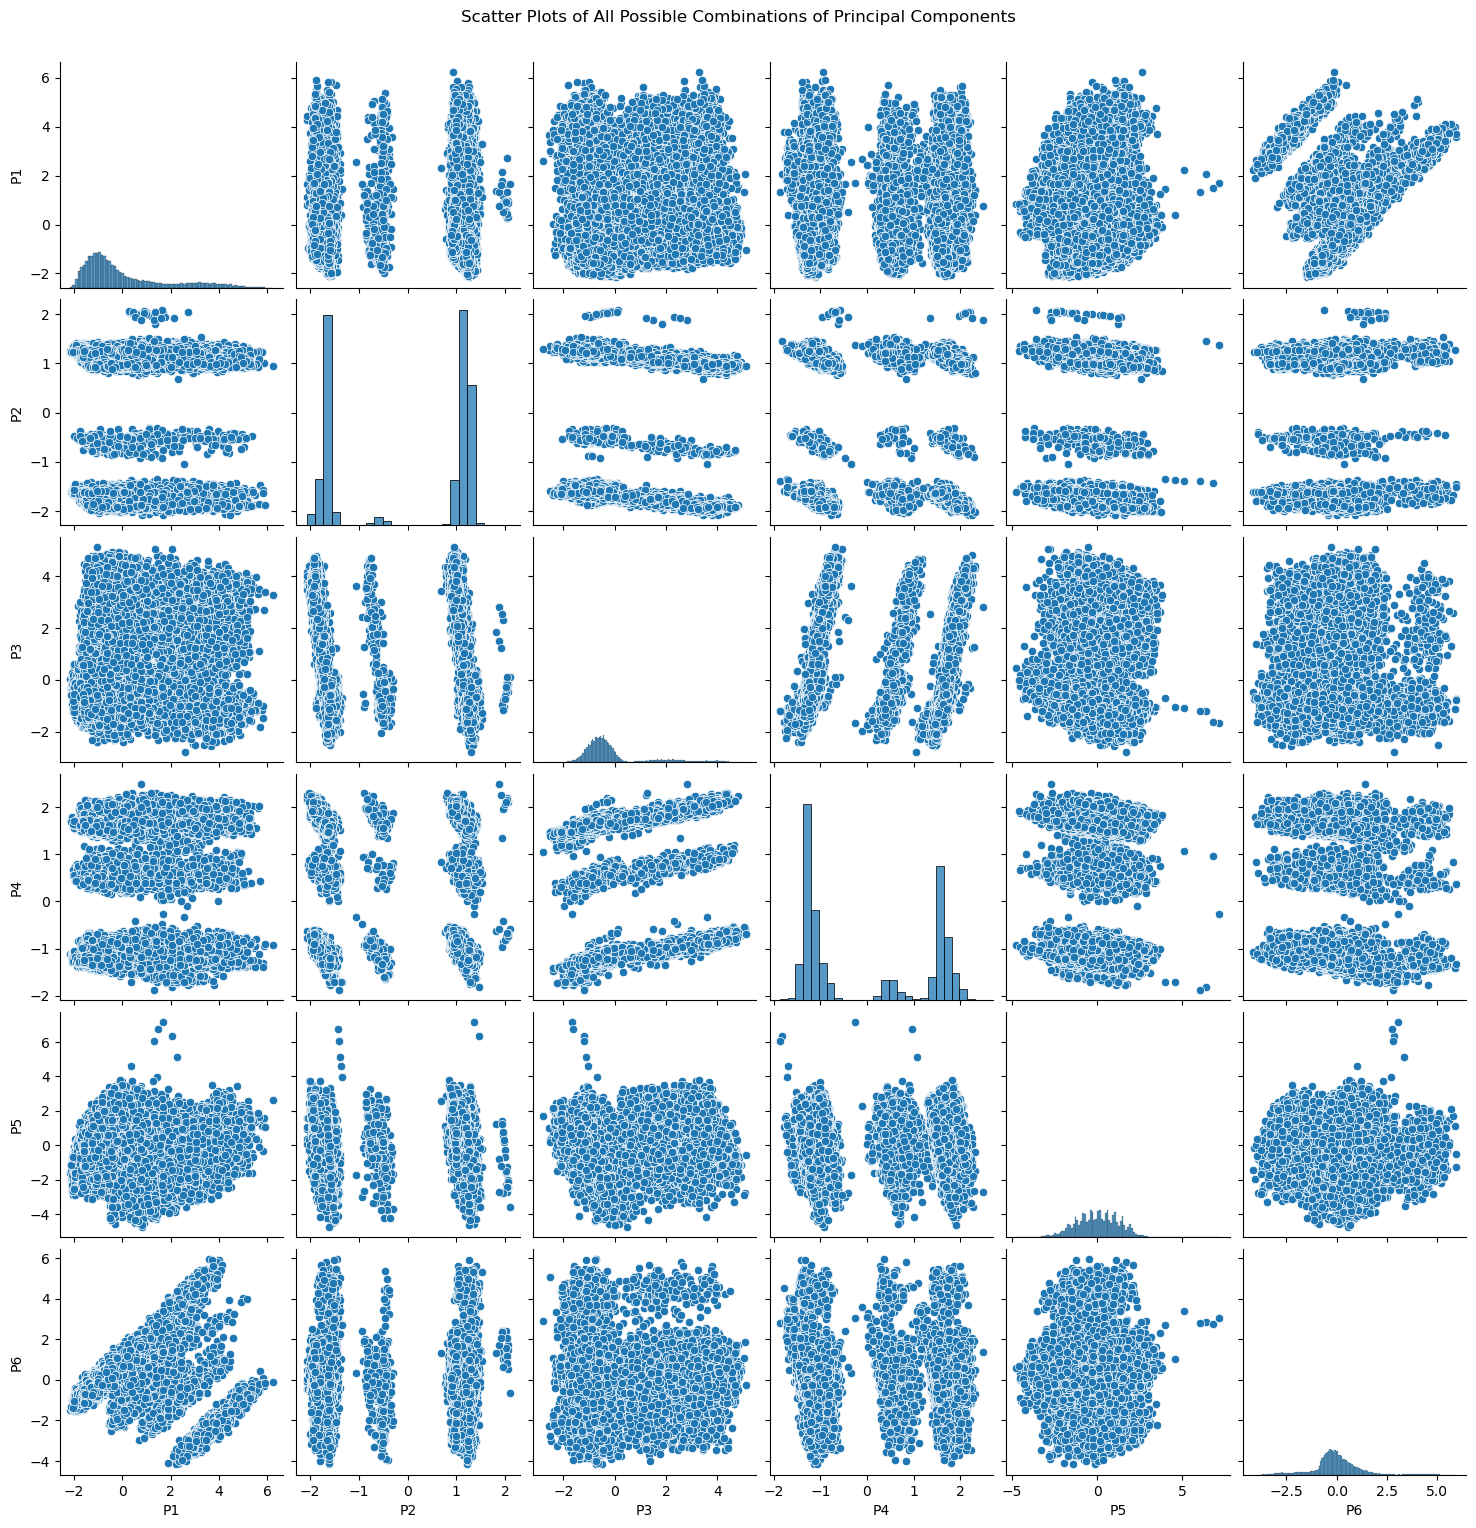

In [8]:
# Pairplot of the principal components
sns.pairplot(X_principal)
plt.suptitle('Scatter Plots of All Possible Combinations of Principal Components', y=1.02)
plt.show()

### DBSCAN

#### Parameters

In [6]:
from itertools import product

eps_values = np.arange(0.5,3,0.5) # eps values to be investigated
min_samples = np.arange(50, 650, 100) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

#### Silhouette Scores

In [7]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_principal)
    labels = DBS_clustering.labels_
    n_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)
    no_of_clusters.append(n_clusters)
    
    # Calculate silhouette score only if there are at least 2 clusters
    if n_clusters > 1:
        sil_score.append(silhouette_score(X_principal, labels))
    else:
        sil_score.append(-1)  # Use -1 as a placeholder for invalid silhouette scores

# Convert lists to numpy arrays for better handling
no_of_clusters = np.array(no_of_clusters)
sil_score = np.array(sil_score)

# Filter out invalid silhouette scores
valid_scores = sil_score[sil_score != -1]

print("Number of clusters for each parameter set:", no_of_clusters)
print("Silhouette scores for valid parameter sets:", valid_scores)

Number of clusters for each parameter set: [ 8  4  4  3  2  1 13 10  5  4  4  4  3  7  7  6  4  4  1  1  1  1  1  2
  1  1  1  1  1  1]
Silhouette scores for valid parameter sets: [-0.05193456  0.07776386  0.01808764 -0.05993859 -0.14155058  0.01487537
  0.18457262  0.17313031  0.17425535  0.16737846  0.15809517  0.17888718
  0.21477682  0.25470364  0.23383903  0.23825477  0.22590629  0.3062136 ]


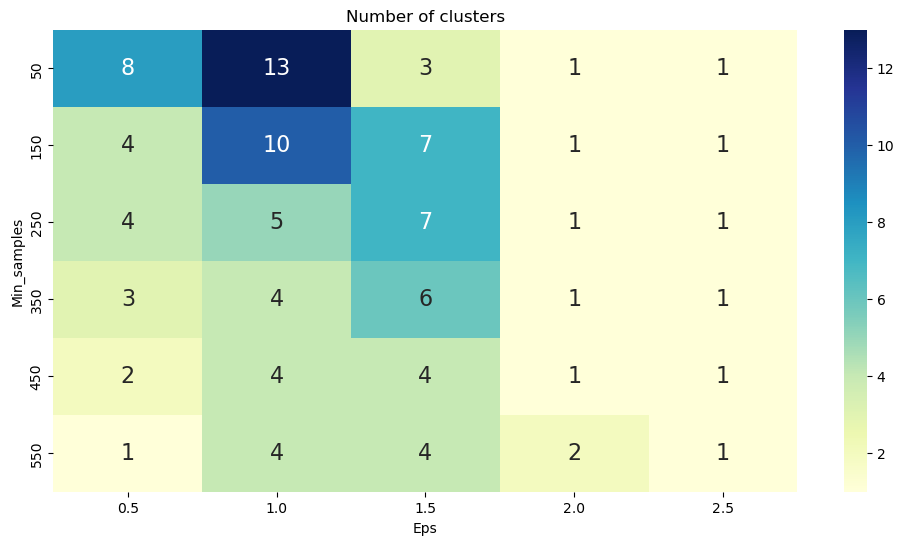

In [8]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

4 appears to be a good cluster.

### Implement DBSCAN

In [29]:
#Highest silhouette score for 4
DBS_clustering = DBSCAN(eps=1.5, min_samples=450).fit(X_principal)

DBSCAN_clustered = X_principal.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ 

#### Check Cluster sizes

In [30]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

DBSCAN_size
Cluster             
-1              7889
 0              6150
 1              9032
 2              7096
 3              4686

This is almost evenly distributed. Silhouette score = 0.24

### Cluster EDA

In [31]:
#colab
'''df = pd.read_parquet("/content/drive/MyDrive/BPI Clustering Project/cluster_analysis.parquet")
df.head()'''

#local
df = pd.read_parquet("cluster_analysis.parquet")
df.head()

EDUCATION   AGE    TENURE  BUSINESS_OWNER  DIGITAL_FLAG  \
CUST_NUM                                                                
13401.256807          1  23.0  1.295890               0             0   
4230.004965           0  22.0  8.205479               0             0   
4481.937304           0  23.0  7.073973               0             0   
4734.959768           0  23.0  3.468493               0             0   
4828.128416           1  23.0  4.857534               0             0   

             INCOME_SOURCE  SUBSEGMENT  GENDER MARITAL_STATUS  Frequency_cred  \
CUST_NUM                                                                        
13401.256807        SALARY           0    MALE         SINGLE              17   
4230.004965      ALLOWANCE           2    MALE         SINGLE              83   
4481.937304         SALARY           2  FEMALE         SINGLE              42   
4734.959768         SALARY           0  FEMALE         SINGLE              11   
4828.128416     REMITTANCE           1  FEMALE         SINGLE               1   

                AMOUNT_cred  Recency_cred   LATITUDE   LONGITUDE  
CUST_NUM                                                          
13401.256807    4987.052711            85  15.527737  120.419269  
4230.004965   131910.554528            85  14.608637  121.031947  
4481.937304    20333.322087            92  14.608637  121.031947  
4734.959768    49872.216089            92  14.608637  121.031947  
4828.128416     2130.039143           127  14.608637  121.031947

### Assign Cluster Column

In [32]:
df['Cluster'] = DBSCAN_clustered['Cluster'].values
df.head()

EDUCATION   AGE    TENURE  BUSINESS_OWNER  DIGITAL_FLAG  \
CUST_NUM                                                                
13401.256807          1  23.0  1.295890               0             0   
4230.004965           0  22.0  8.205479               0             0   
4481.937304           0  23.0  7.073973               0             0   
4734.959768           0  23.0  3.468493               0             0   
4828.128416           1  23.0  4.857534               0             0   

             INCOME_SOURCE  SUBSEGMENT  GENDER MARITAL_STATUS  Frequency_cred  \
CUST_NUM                                                                        
13401.256807        SALARY           0    MALE         SINGLE              17   
4230.004965      ALLOWANCE           2    MALE         SINGLE              83   
4481.937304         SALARY           2  FEMALE         SINGLE              42   
4734.959768         SALARY           0  FEMALE         SINGLE              11   
4828.128416     REMITTANCE           1  FEMALE         SINGLE               1   

                AMOUNT_cred  Recency_cred   LATITUDE   LONGITUDE  Cluster  
CUST_NUM                                                                   
13401.256807    4987.052711            85  15.527737  120.419269        0  
4230.004965   131910.554528            85  14.608637  121.031947        0  
4481.937304    20333.322087            92  14.608637  121.031947        1  
4734.959768    49872.216089            92  14.608637  121.031947        1  
4828.128416     2130.039143           127  14.608637  121.031947        1

### Pairplot

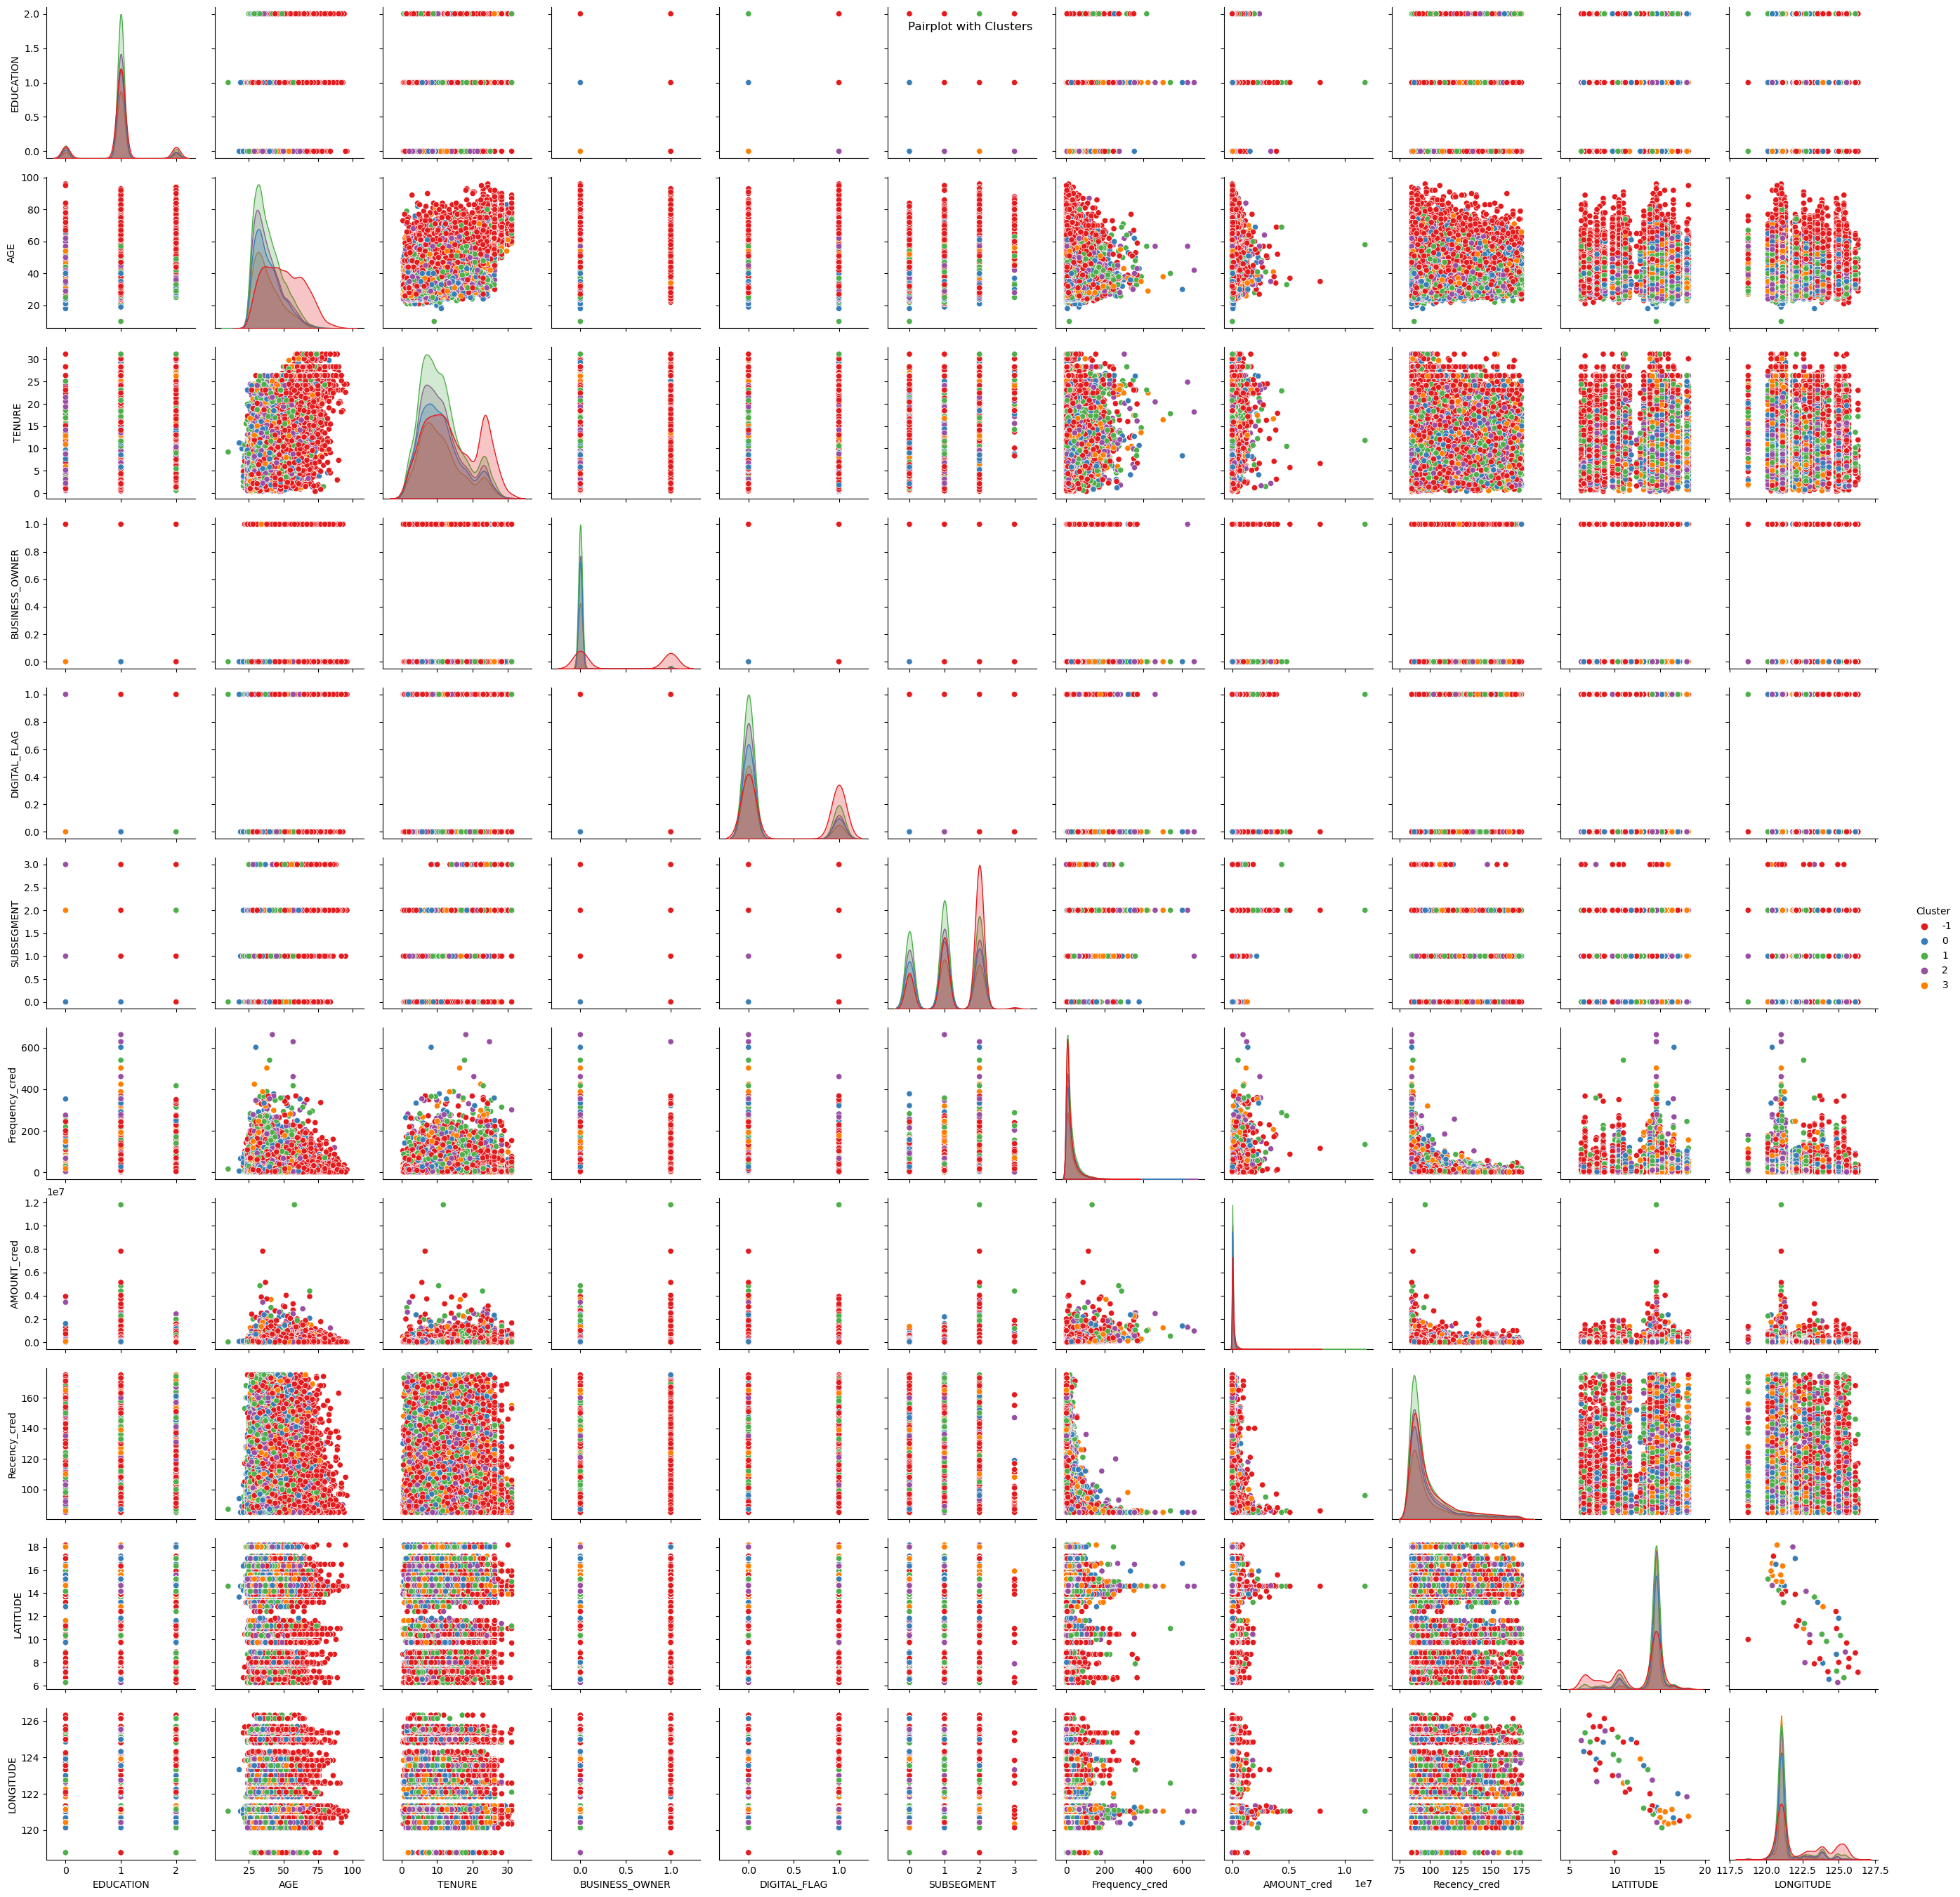

In [33]:
# Plotting pairplot with hue as clusters
sns.pairplot(df, hue='Cluster', palette='Set1')
plt.suptitle('Pairplot with Clusters')
plt.show()

#### Cluster Distribution

<Axes: xlabel='Cluster', ylabel='count'>

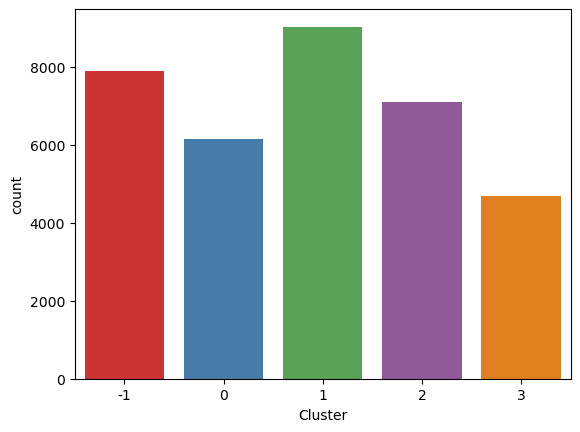

In [41]:
sns.countplot(x=df['Cluster'], palette='Set1')

### Define Clusters

In [37]:
clusters = []
for i in range(0, 4):
    exec('cluster_{k} = df[df[\'Cluster\'] == {k}]'.format(k = i))
    exec('clusters.append(cluster_{k})'.format(k = i))
cluster_out = df[df['Cluster'] == -1]
clusters.append(cluster_out)

### Histograms

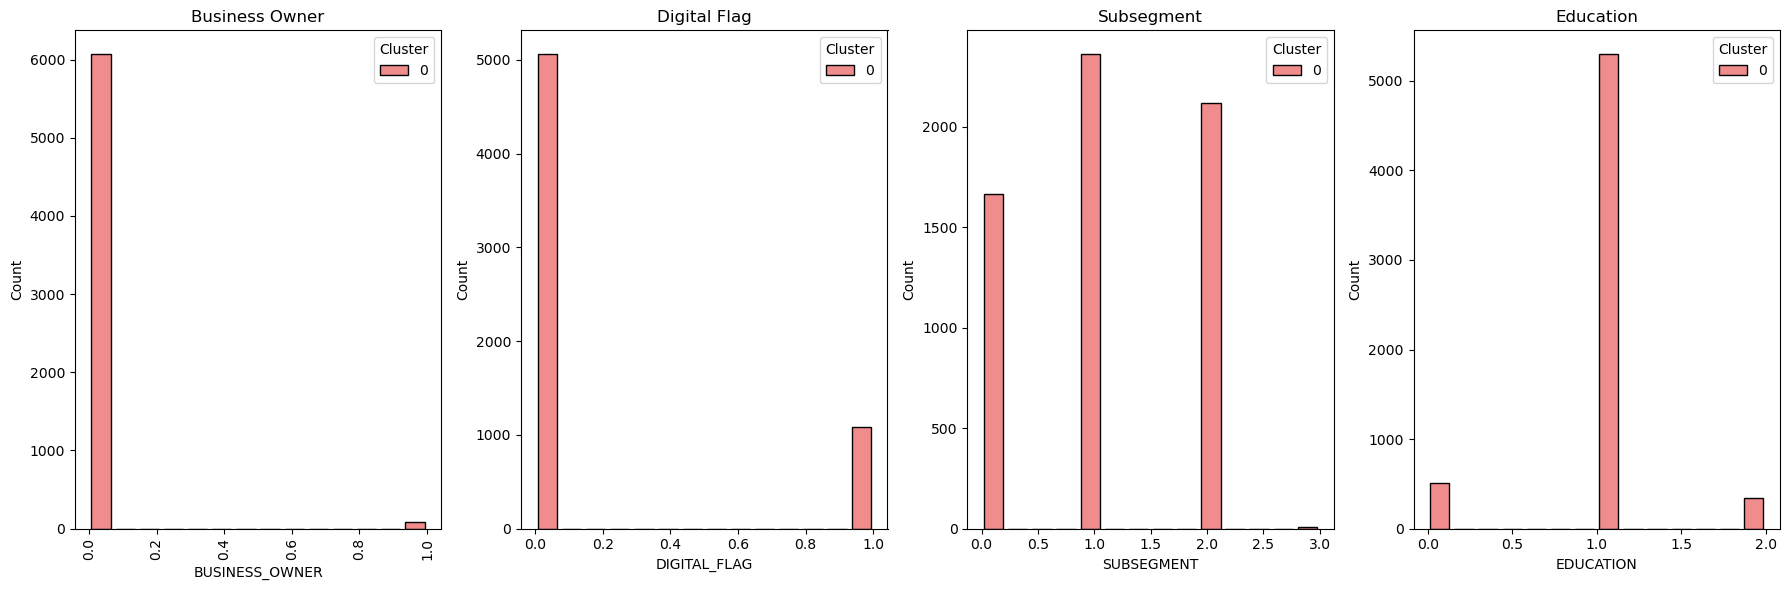

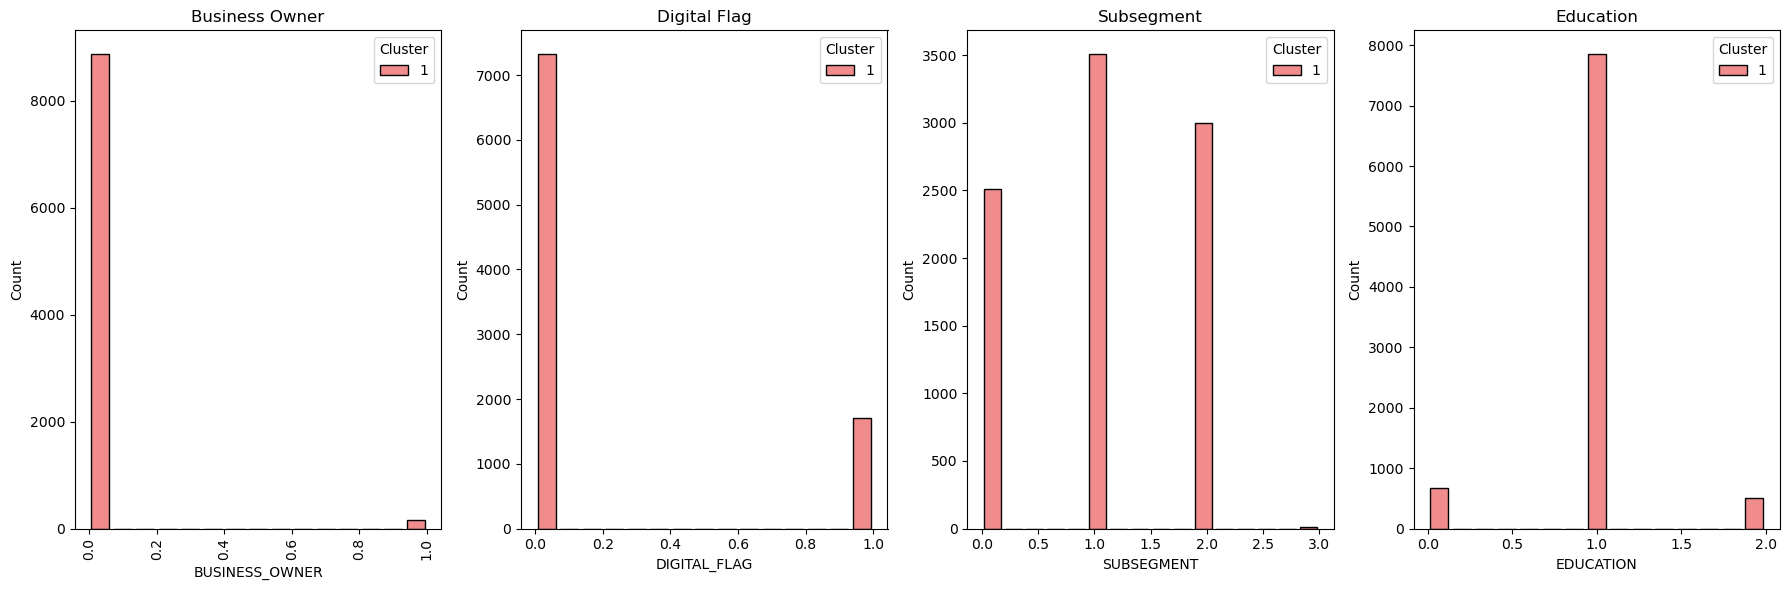

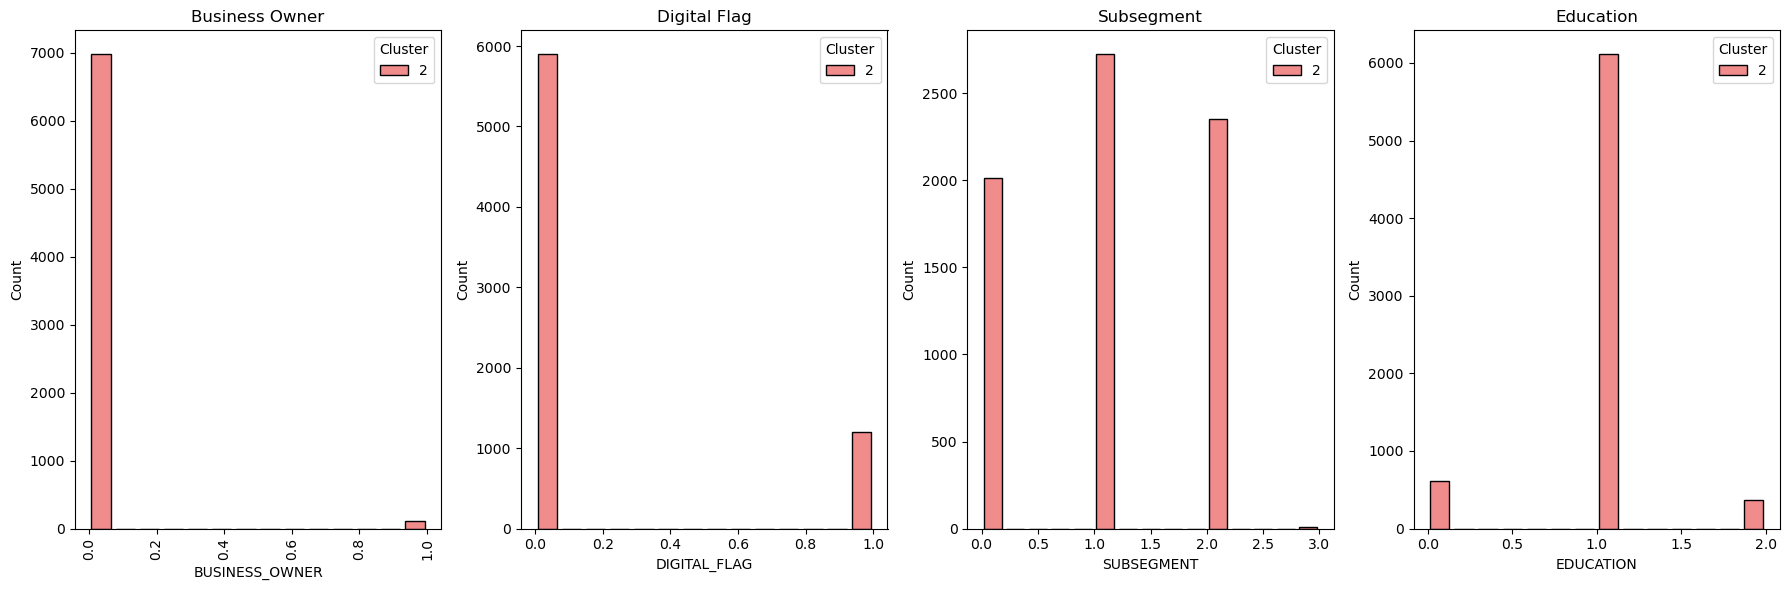

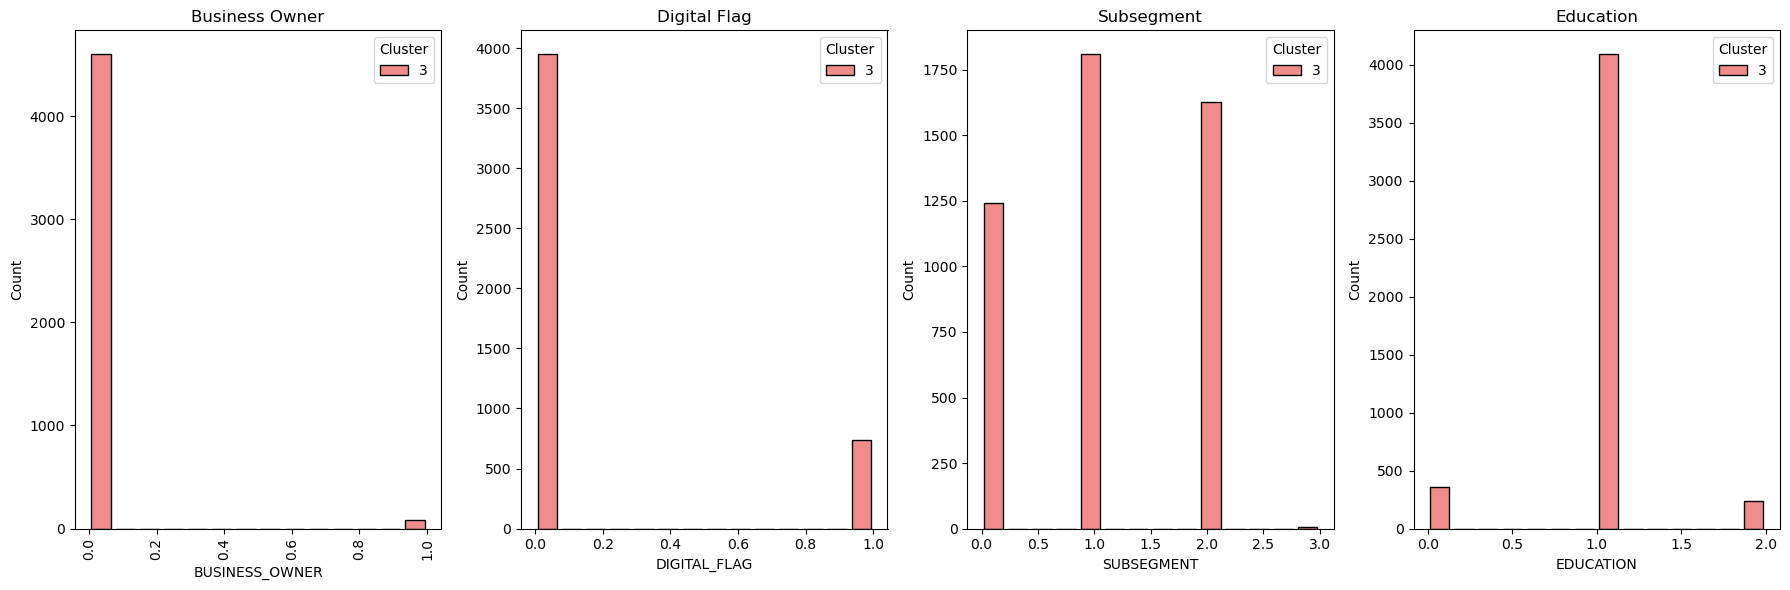

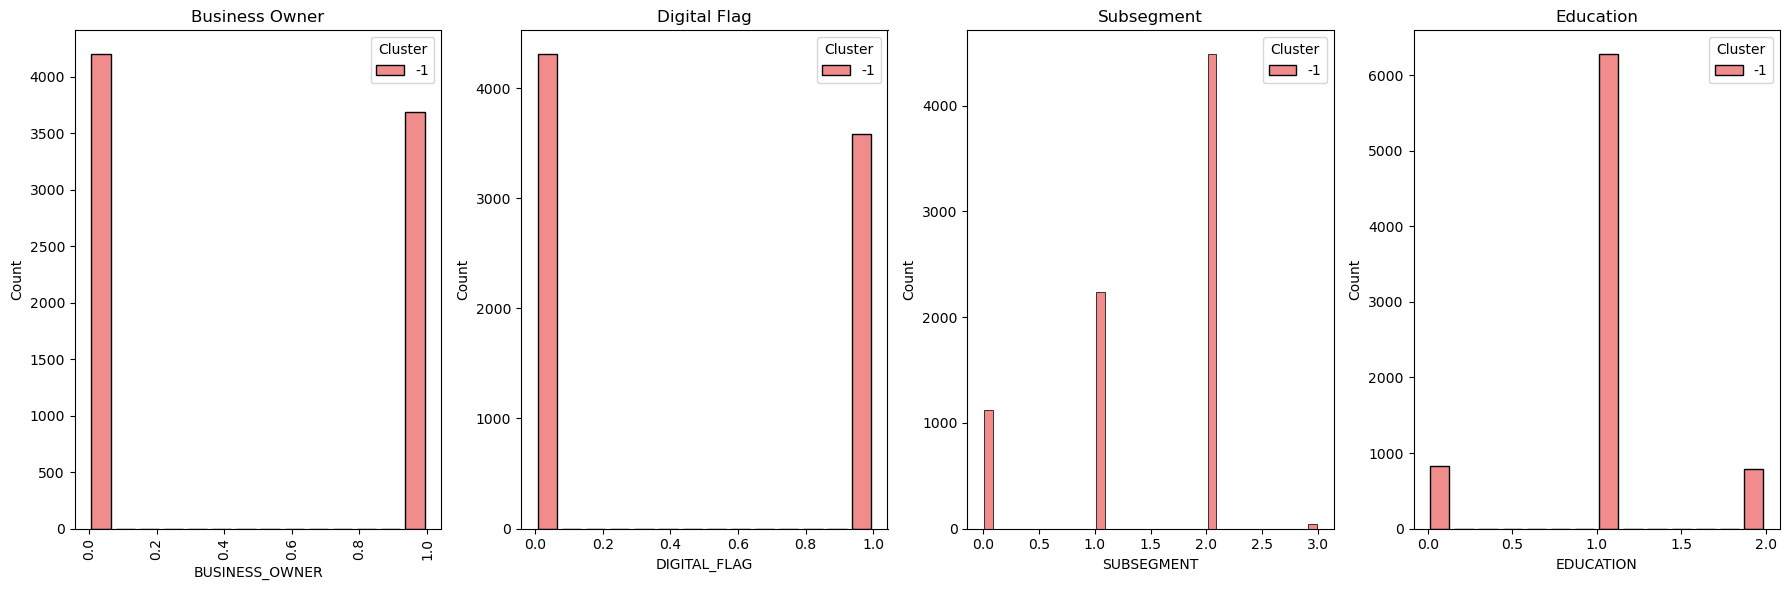

In [38]:
for i in clusters:
    
    # Create a figure and axis for subplots
    fig, axes = plt.subplots(1, 4, figsize=(18, 6))
    
    # Plotting histograms for each categorical variable
    sns.histplot(i, x='BUSINESS_OWNER', hue='Cluster', ax=axes[0], palette='Set1', shrink=0.8)
    axes[0].set_title('Business Owner')
    axes[0].tick_params(axis='x', rotation=90)
    
    sns.histplot(i, x='DIGITAL_FLAG', hue='Cluster', ax=axes[1], palette='Set1', shrink=0.8)
    axes[1].set_title('Digital Flag')
    
    sns.histplot(i, x='SUBSEGMENT', hue='Cluster', ax=axes[2], palette='Set1', shrink=0.8)
    axes[2].set_title('Subsegment')
    
    sns.histplot(i, x='EDUCATION', hue='Cluster', ax=axes[3], palette='Set1', shrink=0.8)
    axes[3].set_title('Education')
    # Adjust layout
    
    plt.tight_layout()
    plt.show()

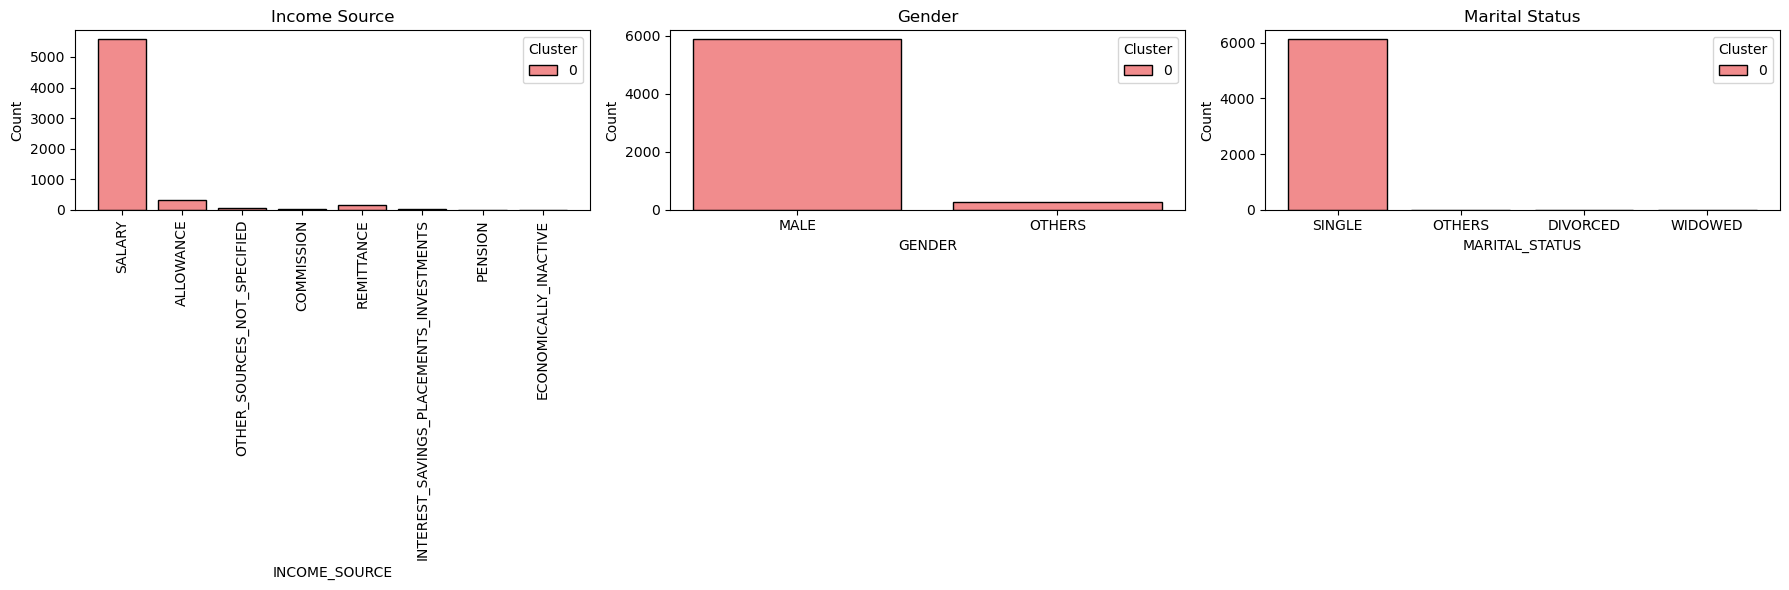

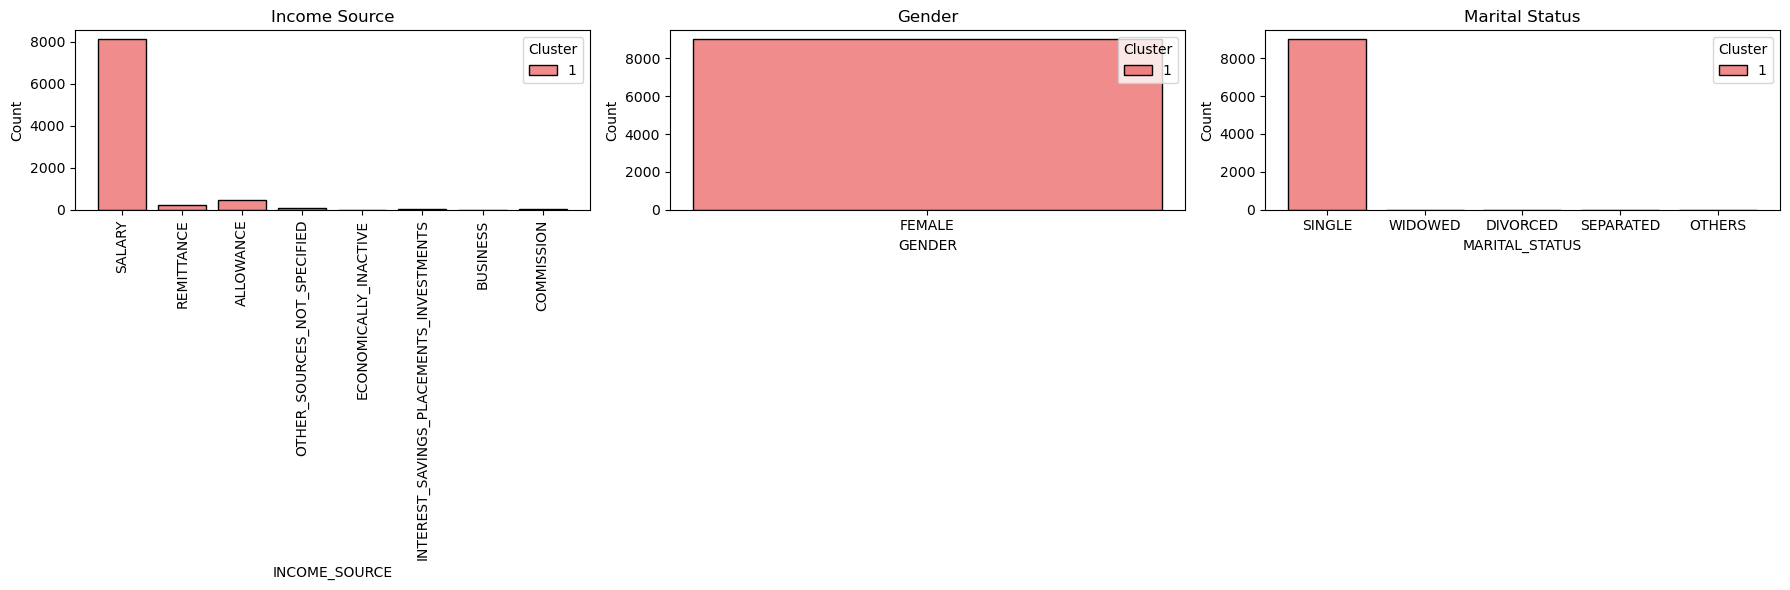

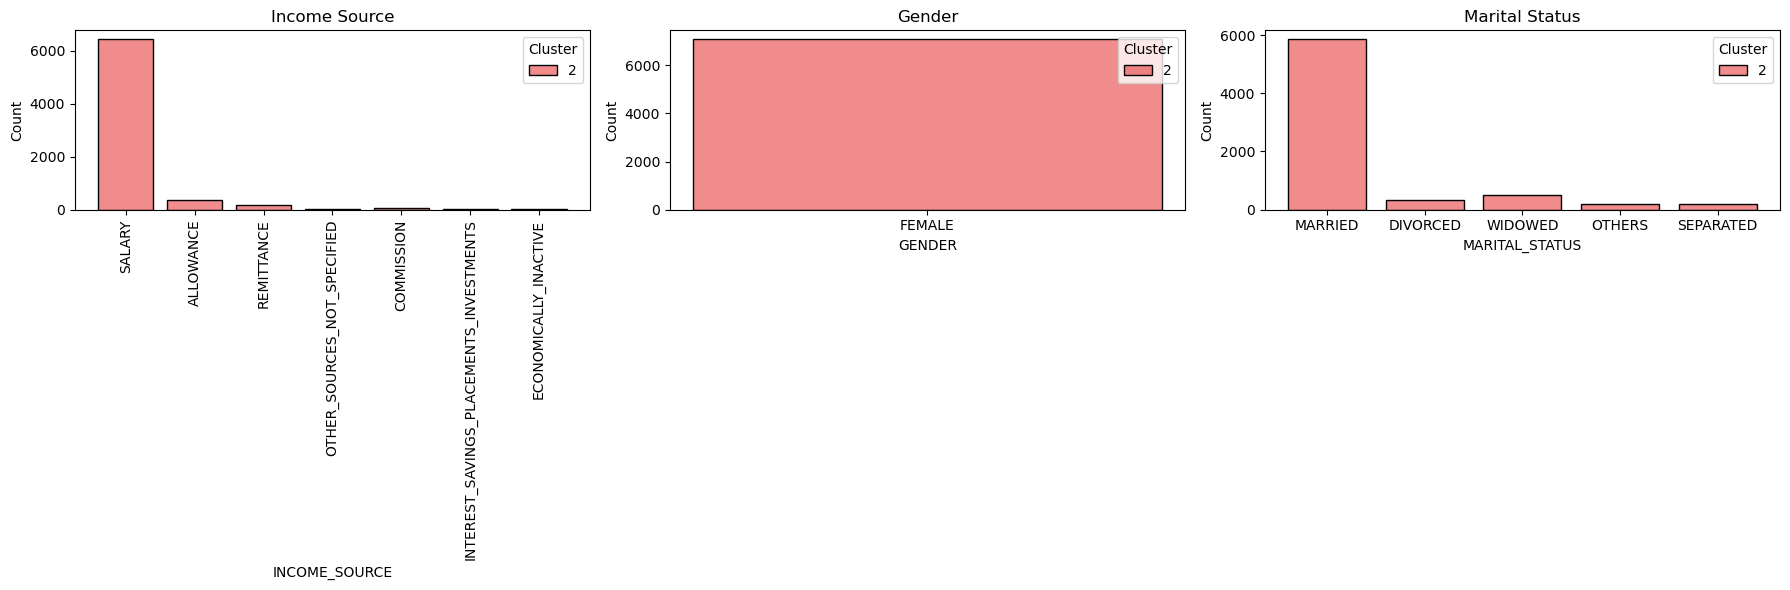

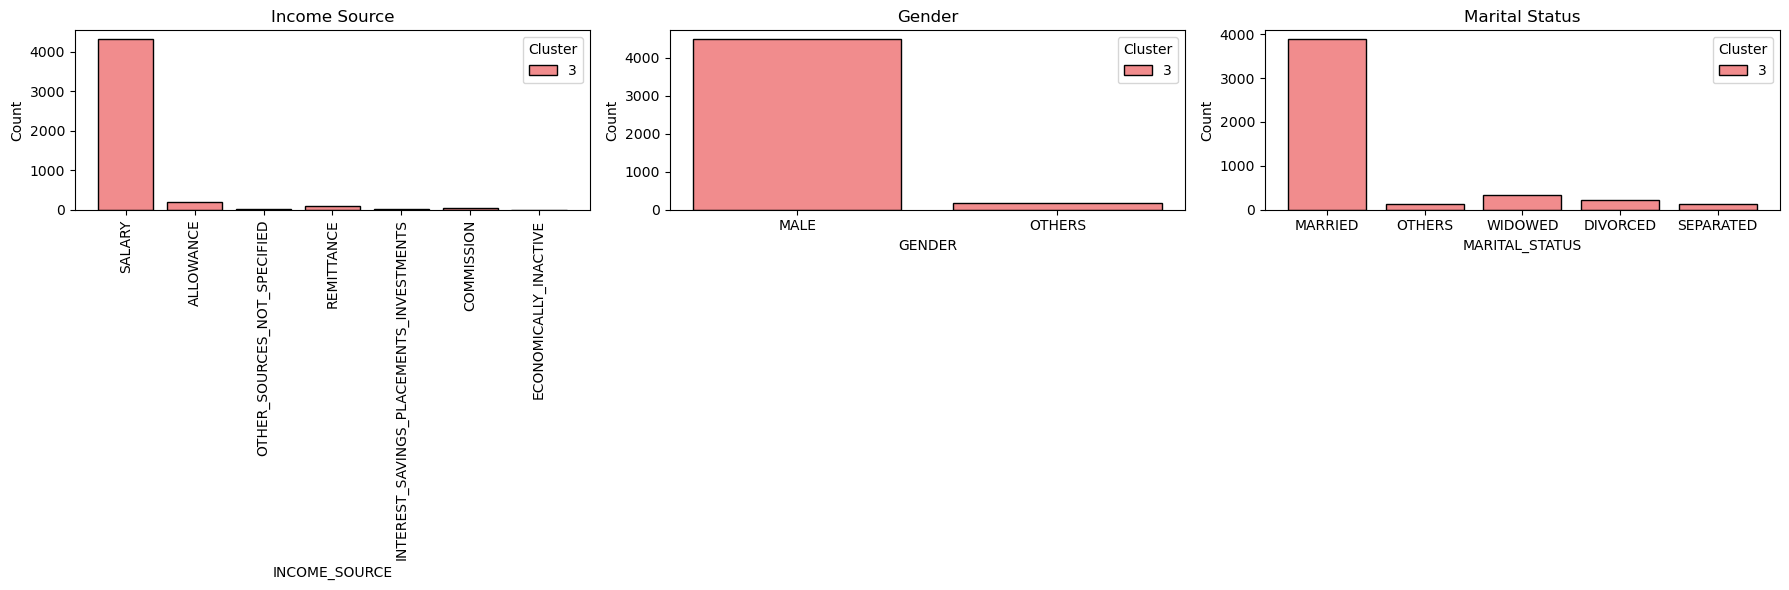

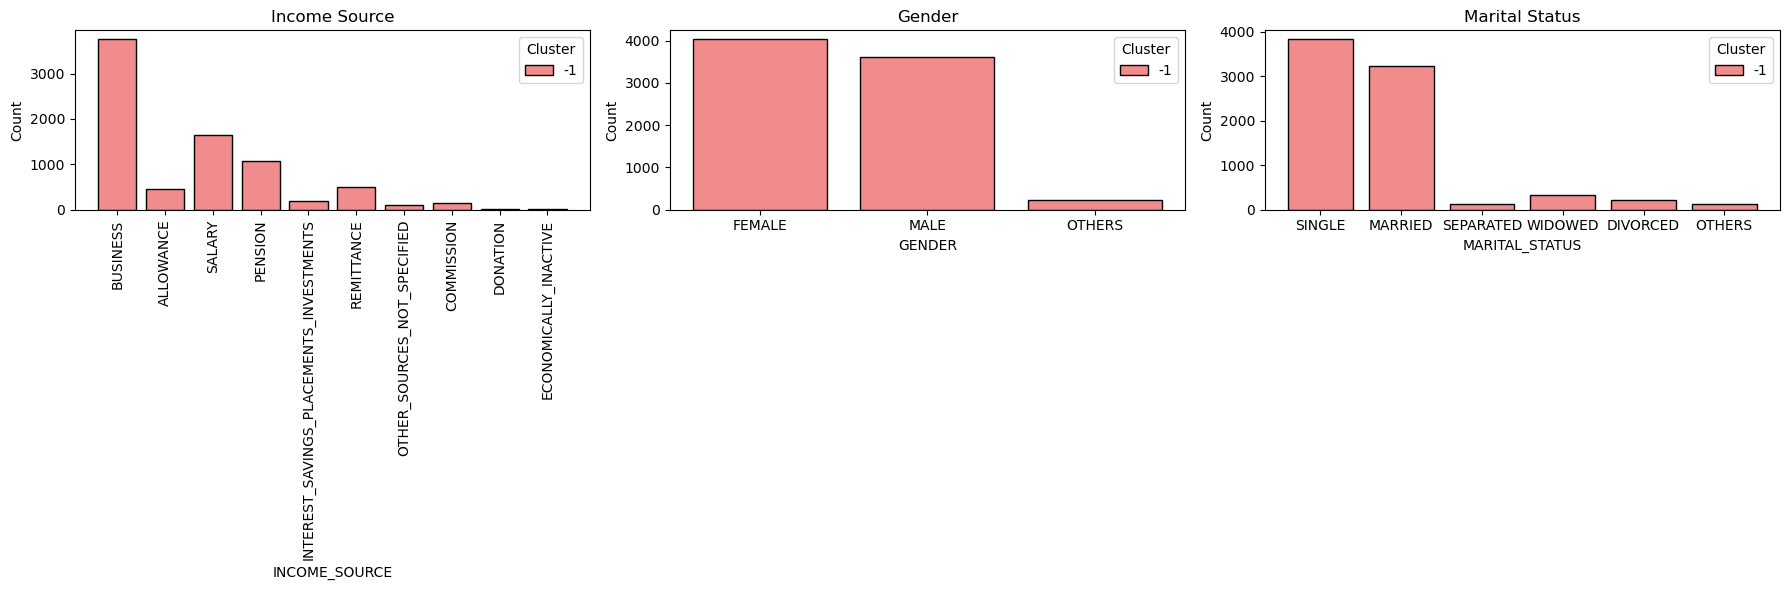

In [39]:
for i in clusters:
    
    # Create a figure and axis for subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plotting histograms for each categorical variable
    sns.histplot(i, x='INCOME_SOURCE', hue='Cluster', ax=axes[0], palette='Set1', shrink=0.8)
    axes[0].set_title('Income Source')
    axes[0].tick_params(axis='x', rotation=90)
    
    sns.histplot(i, x='GENDER', hue='Cluster', ax=axes[1], palette='Set1', shrink=0.8)
    axes[1].set_title('Gender')
    
    sns.histplot(i, x='MARITAL_STATUS', hue='Cluster', ax=axes[2], palette='Set1', shrink=0.8)
    axes[2].set_title('Marital Status')
    
    # Adjust layout
    
    plt.tight_layout()
    plt.show()

## Affinity Propagation